In [12]:
import os
import cv2
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#create blank mask with image sizes
def create_binary_masks(im, shape_dicts):
    
    blank = np.zeros(shape=(im.shape[0], im.shape[1]), dtype=np.float32)
    for shape in shape_dicts:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(blank, [points], 255)
    return blank

#get annotated points
def get_poly(ann_path):
    
    with open(ann_path) as handle:
        data = json.load(handle)
    shape_dicts = data['shapes']
    
    return shape_dicts

In [9]:
img_dir =r"E:\personal_copy_folder\segmentation\try\data"
mask_save_dir =r"E:\personal_copy_folder\segmentation\try\save_mask"
ext =".png"
save_ext =".png"

In [10]:
#save all image files and json files separately to list

image_list = sorted(glob.glob(img_dir+'\*'+ext))
print(len(image_list))
ann_list = sorted(glob.glob(img_dir+'\*.json'))
print(len(ann_list))
save_mask_dir=mask_save_dir

2
2


img_2_18432_0.png
img_2_18432_1024.png


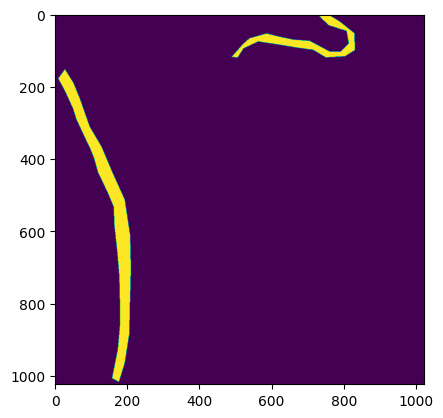

In [13]:
for im_fn, ann_fn in zip(image_list, ann_list):
    
    im = cv2.imread(im_fn, 0)
    shape_dicts = get_poly(ann_fn)
    im_binary = create_binary_masks(im, shape_dicts)
    
    #extract the name of image file
    filename = im_fn.split(ext)[-2].split('\\')[-1] + save_ext
    print(filename)
    plt.imshow(im_binary)
    cv2.imwrite(mask_save_dir+"\\"+filename, im_binary)